# Load in Data

In [77]:
# Import packages
import matplotlib.pyplot as plt
import pickle
import numpy as np
from itertools import permutations
import random
import time

# Load in data
   
theta_store_all_K = pickle.load( open( "theta_store_all_K.plk", "rb" ))
print(theta_store_all_K)
print ("size = ", len(theta_store_all_K))
print ("elm size = ", len(theta_store_all_K[0]))
print ("elm2 size = ", len(theta_store_all_K[0][0]))
print("\n\n")

time_storage_K = pickle.load( open( "time_storage_K.plk", "rb" ))
print(time_storage_K)
print ('time_storage_K')
print("\n\nNewton\n")

theta_store_all_N = pickle.load( open( "theta_store_all_N.txt", "rb" ))
print(theta_store_all_N)
print ("size = ", len(theta_store_all_N))
print ("elm size = ", len(theta_store_all_N[0]))
print ("elm2 size = ", len(theta_store_all_N[0][0]))
print("\n\n")

time_storage_N = pickle.load( open( "time_storage_N.txt", "rb" ))
print ('time_storrage N')
print(time_storage_N)
print("\n\n")

X_test = np.loadtxt("X_test.txt")
y_test = np.loadtxt("y_test.txt")
theta_star = np.loadtxt("theta_star.txt")
print ("X_test")
print (X_test)
print ("\n\ny_test")
print (y_test)
print ("\n\ntheta_star")
print (theta_star)

example_nums = [1000, 3162, 10000, 31622, 100000]

mse_star = 0.0221585882942


# newton_thetas = pickle.load( open( "save.p", "rb" ) )
# newton_times = pickle.load( open( "save.p", "rb" ) )
# newton_mses = pickle.load( open( "save.p", "rb" ) )

# online_thetas = pickle.load( open( "save.p", "rb" ) )
# online_times = pickle.load( open( "save.p", "rb" ) )
# online_mses = pickle.load( open( "save.p", "rb" ) )

# Test Data
newton_thetas = [0.01, 0.006, 0.004, 0.0008, 0.0001]
newton_times = [50, 325, 1340, 6400 ,9800]

online_thetas = [0.02, 0.007, 0.005, 0.0009, 0.0003]
online_times = [570, 305, 1240, 5400 ,8900]

print ("Done Loading")

[[array([ 1.37752464,  0.40324018,  2.49284596, -2.34530791,  1.42934746,
        0.81659154,  0.17751473,  0.0361403 ,  0.28444357, -0.1231689 ,
        0.34318517, -0.19844874,  1.26000733, -0.51365481, -0.54750074,
        0.4534858 ,  0.094699  ,  1.9371471 ,  0.89137001,  0.59142025]), array([ 0.8561681 ,  1.33484428,  0.78184923,  1.61966151,  0.16464493,
        1.45794414, -0.14779569, -0.1027724 ,  2.06206082,  0.98795754,
        1.77853652,  0.26876017,  1.18858234, -1.04230367, -1.18707837,
        0.81986   ,  1.2035444 , -1.14718159,  1.57601589, -1.35153787]), array([ 1.02987685, -0.37982366,  0.50521614,  2.53131623, -0.06081684,
        0.0681532 , -2.03668088, -2.55207039,  1.22759698,  0.4910782 ,
        0.79341735,  1.75691497, -2.24311858,  0.10172969,  0.45595453,
        1.16859277,  2.48172805,  0.89747255,  1.98201556,  1.30982202]), array([ 1.06684607e+00, -1.42810254e+00,  6.80264031e-01, -7.99517120e-01,
        7.57850031e-01, -4.04794958e-01,  3.28412765e

X_test
[[-0.73062042 -0.67843435  0.22095353 ... -1.83088093 -0.77679834
   0.65398992]
 [ 0.1674138   0.09879668  2.03516724 ...  0.6224033   2.14565232
   0.89753504]
 [ 1.23661163  0.89624332  0.35352076 ...  1.2379662  -0.90510268
   2.9322789 ]
 ...
 [ 2.15097601  1.90377496  3.47097941 ...  0.05807788  0.42501799
   1.9803761 ]
 [ 2.52986112  1.13217326  2.88527427 ...  0.00742859  0.29716932
   2.12649137]
 [ 1.76745127  1.09759582  2.33263246 ...  1.68741581  1.05733519
  -0.74699922]]


y_test
[-1.  1.  1. ...  1.  1.  1.]


theta_star
[0.10379889 0.10293186 0.1022649  0.10180494 0.09968113 0.09902356
 0.10372763 0.09996634 0.10460607 0.10307568 0.10185606 0.09915726
 0.1019928  0.10426263 0.10151795 0.10119983 0.10304201 0.10475818
 0.09945104 0.10477722]
Done Loading


In [109]:
# Create MSE

# find mse error on test data
from numpy import outer, matmul, inner
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv, norm

n_ex = 5
Nperm = 30
Ntheta = 20

def func(X, theta):
    return  1.71 * np.tanh(0.66 * matmul(X, theta))

def create_theta_diff(theta_store):
    theta_diff = []

    for i, N in enumerate(example_nums):
        theta_avg = []
        
        for j in range(Ntheta):
            t_array = []
            for k in range(Nperm):
                t_array.append(theta_store[i][k][j])
            t_val = np.mean(t_array)
            theta_avg.append(t_val)
            
        t_diff = norm(theta_avg - theta_star)**2
        theta_diff.append(t_diff)
    print ("t_diff for different examples: ", theta_diff)
    print ("\n")
    return theta_diff

def create_mse(theta_store):
    store_mse = []
    X = X_test
    y = y_test
    for i, N in enumerate(example_nums):
        mse = 0
        for j in range(Nperm):
            theta = theta_store[i][j]
            f = func(X, theta)
            mse += mean_squared_error(f, 1.5*y)/Nperm
        f_star = func(X, theta_star)
        mse_star = mean_squared_error(f_star, 1.5*y)
        store_mse.append(mse)
    print ("mse for different examples: ", store_mse)
    print ("mse star: ", mse_star)
    print ("\n")
    return store_mse

mse_n = create_mse(theta_store_all_N)
mse_k = create_mse(theta_store_all_K)

theta_diff_N = create_theta_diff(theta_store_all_N)
theta_diff_K = create_theta_diff(theta_store_all_K)

print (theta_star)

mse for different examples:  [0.023683694046007023, 0.022649121902546327, 0.022391277870403323, 0.022292038724062962, 0.022255858415964665]
mse star:  0.022158588294225113


mse for different examples:  [0.3447867197687709, 0.35618946554894926, 0.38055083847113724, 0.30534642349967367, 0.3048125755005746]
mse star:  0.022158588294225113


t_diff for different examples:  [0.00030540992513630494, 0.0001679641156062092, 0.00014742944736343983, 0.00013679743203890224, 0.00013908428461632312]


t_diff for different examples:  [2.8281815937261787, 2.9113720848527525, 3.7335772967784244, 3.8436119033850678, 6.534965816180367]


[0.10379889 0.10293186 0.1022649  0.10180494 0.09968113 0.09902356
 0.10372763 0.09996634 0.10460607 0.10307568 0.10185606 0.09915726
 0.1019928  0.10426263 0.10151795 0.10119983 0.10304201 0.10475818
 0.09945104 0.10477722]


# (θ−θ*)^2 by Num Examples

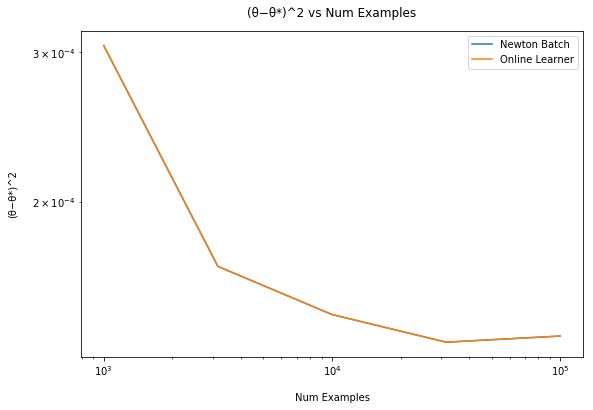

In [111]:
plt.figure(figsize=(9,6))
plt.loglog(example_nums, theta_diff_N)
plt.loglog(example_nums, theta_diff_N)
plt.xlabel("Num Examples", labelpad=15)
plt.ylabel("(θ−θ*)^2", labelpad=15)
plt.title("(θ−θ*)^2 vs Num Examples", y=1.025)
plt.legend(['Newton Batch', 'Online Learner'], loc='upper right')

# (θ−θ*)^2 by Time

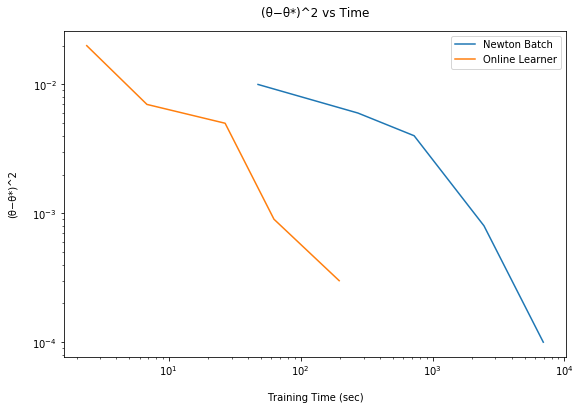

In [80]:
plt.figure(figsize=(9,6))
plt.loglog(time_storage_N, newton_thetas)
plt.loglog(time_storage_K, online_thetas)
plt.xlabel("Training Time (sec)", labelpad=15)
plt.ylabel("(θ−θ*)^2", labelpad=15)
plt.title("(θ−θ*)^2 vs Time", y=1.025)
plt.legend(['Newton Batch', 'Online Learner'], loc='upper right')

# Avg Test MSE by Num Examples

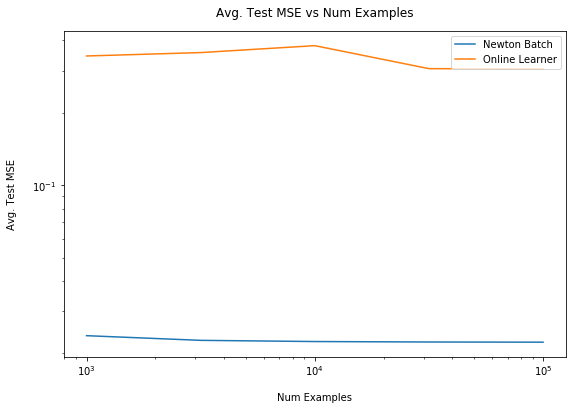

In [104]:
plt.figure(figsize=(9,6))
plt.loglog(example_nums, mse_n)
plt.plot(example_nums, mse_k)
plt.xlabel("Num Examples", labelpad=15)
plt.ylabel("Avg. Test MSE", labelpad=15)
plt.title("Avg. Test MSE vs Num Examples", y=1.025)
plt.legend(['Newton Batch', 'Online Learner'], loc='upper right')

# Avg Test MSE by Time

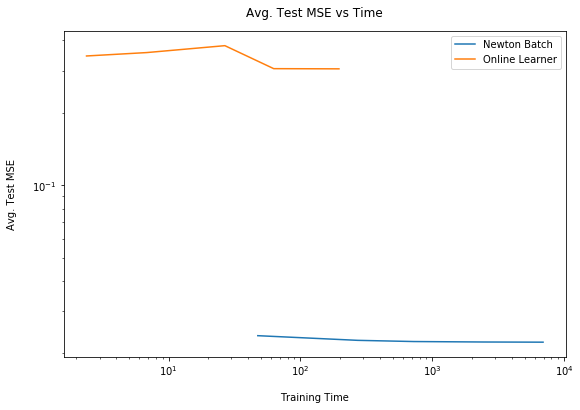

In [98]:
plt.figure(figsize=(9,6))
plt.loglog(time_storage_N, mse_n)
plt.loglog(time_storage_K, mse_k)
plt.xlabel("Training Time", labelpad=15)
plt.ylabel("Avg. Test MSE", labelpad=15)
plt.title("Avg. Test MSE vs Time", y=1.025)
plt.legend(['Newton Batch', 'Online Learner'], loc='upper right')